In [1]:
import pandas as pd 
import numpy as np
# Importing requests to extract content from a url
import requests   
# Beautifulsoup is for web scrapping...used to scrap specific content 
from bs4 import BeautifulSoup as bs 
import re 
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob 

In [4]:
def get_sentiment(review): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(review)
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [6]:
positive = "positive-words.txt"

get_sentiment(a)

'negative'

# Vader Lexicon

In [7]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [10]:
sia = SentimentIntensityAnalyzer()
positive = "positive-words.txt"
sia.polarity_scores(a)


{'neg': 0.0, 'neu': 0.689, 'pos': 0.311, 'compound': 0.6072}

In [11]:
def get_vader_sentiment(review): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    sia = SentimentIntensityAnalyzer()
    # create TextBlob object of passed tweet text 
    analysis = sia.polarity_scores(review)
    # set sentiment 
    if analysis["compound"] > 0: 
        return 'positive'
    elif analysis["compound"] < 0: 
        return 'negative'
    else: 
        return 'neutral'

In [21]:
# creating empty reviews list 
positive_reviews=[]
#forest = ["the","king","of","jungle"]


positive=[] 
positive = "positive-words.txt"
#url="http://www.imdb.com/title/tt3521164/reviews?ref_=tt_urv"
#url="https://www.amazon.in/Apple-MacBook-Air-13-3-inch-Integrated/product-reviews/B073Q5R6VR/ref=cm_cr_arp_d_paging_btm_2?showViewpoints=1&pageNumber="+str(i)
#url = "https://www.amazon.in/All-New-Kindle-reader-Glare-Free-Touchscreen/product-reviews/B0186FF45G/ref=cm_cr_getr_d_paging_btm_3?showViewpoints=1&pageNumber="
response = requests.get(positive)
print(response.status_code)
# create soup object to iterate over the extracted content 
soup = bs(response.content,"positive")


#print(soup)
# Extracting the content under specific tags  
reviews = soup.findAll("span",attrs={"class","a-size-base review-text-content"})
reviews = soup.findAll("div", attrs={"class","text"})
#for i in range(len(reviews)):
 # empty dictionary to store required params 
rev = [] 


for i in range(1,4):
    parsed_rev = {} 
    parsed_rev['rev_positive'] = i
    #parsed_rev['blob_sentiment'] = get_vader_sentiment(reviews[i].text)
    parsed_rev['vader_sentiment'] = get_vader_sentiment(reviews[i].text)
    positive.append(reviews[i].text)  
    rev.append(parsed_rev)
    
# adding the reviews of one page to empty list which in future contains all the reviews
positive_reviews=positive_reviews+positive  
rev

MissingSchema: Invalid URL 'positive-words.txt': No schema supplied. Perhaps you meant http://positive-words.txt?

In [22]:
reviews[2].text, rev[2]

IndexError: list index out of range

# Rule Based Approach

In [27]:
# Reading reviews from a text file 
with open("positive-words.txt","r",encoding='utf8') as input:
    positive_reviews = input.read()
type(positive_reviews)   

str

In [28]:
# Joinining all the reviews into single paragraph 
#positive_rev_string = " ".join(positive_reviews)
positive_rev_string = positive_reviews
# Removing unwanted symbols incase if exists
#positive_rev_string = re.sub("[^A-Za-z" "]+"," ",positive_rev_string).lower()
positive_rev_string = re.sub("[0-9" "]+"," ",positive_rev_string)


# words that contained in iphone 7 reviews
positive_reviews_words = positive_rev_string.split(" ")

stop_words = stopwords.words('english')
#stopwords = stop_words.split("\n")

positive_reviews_words = [w for w in positive_reviews_words if not w in stop_words]

# Joinining all the reviews into single paragraph 
positive_rev_string = " ".join(positive_reviews_words)

In [29]:
## Example
positive_rev_string

';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\n; \n; Opinion Lexicon: Positive\n;\n; This file contains list POSITIVE opinion words (or sentiment words).\n;\n; This file papers downloaded \n;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html\n;\n; If use list, please cite one following two papers:\n;\n;   Minqing Hu Bing Liu. "Mining Summarizing Customer Reviews." \n;       Proceedings ACM SIGKDD International Conference Knowledge \n;       Discovery Data Mining (KDD- ), Aug  - ,  , Seattle, \n;       Washington, USA, \n;   Bing Liu, Minqing Hu Junsheng Cheng. "Opinion Observer: Analyzing \n;       Comparing Opinions Web." Proceedings  th \n;       International World Wide Web conference (WWW- ), May  - , \n;        , Chiba, Japan.\n;\n; Notes: \n;     . The appearance opinion word sentence necessarily  \n;       mean sentence expresses positive negative opinion. \n;       See paper below:\n;\n;       Bing Liu. "Sentiment Analysis Subjectivity."

In [30]:
#temp = ["this","is","awsome","Data","Science"]
#[i for i in temp if i not in "is"]

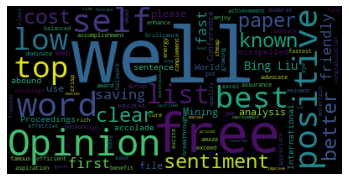

In [31]:
# WordCloud can be performed on the string inputs. That is the reason we have combined 
# entire reviews into single paragraph
# Simple word cloud


wordcloud_positive = WordCloud(
                      background_color='black',
                      max_words = 100
                     ).generate(positive_rev_string)

plt.imshow(wordcloud_positive)
plt.axis("off")
plt.show()

In [41]:
# positive words # Choose the path for +ve words stored in system
with open("positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")
  
poswords = poswords[36:]


# negative words  Choose path for -ve words stored in system
with open("negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

negwords = negwords[37:]


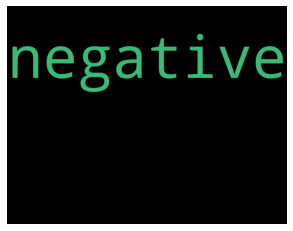

In [44]:
# negative word cloud
# Choosing the only words which are present in negwords
positive_neg_in_neg = " ".join ([w for w in positive_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(positive_neg_in_neg)

plt.imshow(wordcloud_neg_in_neg)
plt.axis("off")



plt.show()

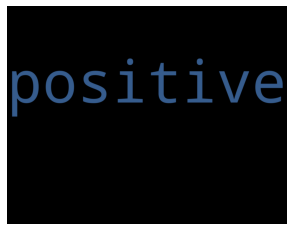

In [45]:
# Positive word cloud
# Choosing the only words which are present in positive words
positive_pos_in_pos = " ".join ([w for w in positive_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(positive_pos_in_pos)
plt.imshow(wordcloud_pos_in_pos)
plt.axis("off")
plt.show()

In [46]:
len(positive_pos_in_pos)

114

In [47]:
len(positive_neg_in_neg)

114

In [49]:
len(positive_reviews_words)

259

In [50]:
114/259

0.44015444015444016